In [1]:
# Read training and test data files
#train = pd.read_csv("/home/info/Tesis/TRAINING_6_categoria.csv")
#test  = pd.read_csv("/home/info/Tesis/TEST_6_categoria.csv")
#train2 = pd.read_csv("/home/info/Tesis/TrainingCK+.csv")
#test2 = pd.read_csv("/home/info/Tesis/TestCK+.csv")

#trainFinal=pd.concat([train,train2])
#testFinal=pd.concat([test,test2])

#trainFinal.to_csv("/home/info/Tesis/TRAINING+.csv",index=False)
#testFinal.to_csv("/home/info/Tesis/TEST+.csv",index=False)
#print(trainFinal.shape)
#print(testFinal.shape)

# Model CNN

In [1]:
# Import classes and functions
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from matplotlib import pyplot as plt


# Read training and test data files

#CK+
train = pd.read_csv("../Tesis_Code/datasets/TrainingCK+.csv").values
np.random.shuffle(train) #ordenar aleatoriamente los datos
test  = pd.read_csv("../Tesis_Code/datasets/TestCK+.csv").values

rutaRest_graphacc="../Tesis_Code/ResultsCK+/acurracyCK+.jpg"
rutaRest_graphloss="../Tesis_Code/ResultsCK+/lossCK+.jpg"
rutaRest_model="../Tesis_Code/ResultsCK+/myModelCK+.h5"
rutaRest_Predicted="../Tesis_Code/ResultsCK+/submissionCK+.csv"




#Fer2013
#train = pd.read_csv("../Tesis_Code/datasets/TRAINING_6_categoria.csv").values
#np.random.shuffle(train) #ordenar aleatoriamente los datos
#test  = pd.read_csv("../Tesis_Code/datasets/TEST_6_categoria.csv").values
#rutaRest_graphacc="../Tesis_Code/ResultsFer/acurracyFerjpg"
#rutaRest_graphloss="../Tesis_Code/ResultsFer/lossFer.jpg"
#rutaRest_model="../Tesis_Code/ResultsFer/myModelFer.h5"
#rutaRest_Predicted="../Tesis_Code/ResultsFer/submissionFer.csv"



#Joined
#train = pd.read_csv("../Tesis_Code/datasets/TRAINING+.csv").values
#np.random.shuffle(train) #ordenar aleatoriamente los datos
#test  = pd.read_csv("../Tesis_Code/datasets/TEST+.csv").values

#rutaRest_graphacc="../Tesis_Code/ResultsBoth/acurracyBoth.jpg"
#rutaRest_graphloss="../Tesis_Code/ResultsBoth/lossBoth.jpg"
#rutaRest_model="../Tesis_Code/ResultsBoth/myModelCKBoth.h5"
#rutaRest_Predicted="../Tesis_Code/ResultsBoth/submissionBoth.csv"





#print(train.shape)
#print(test.shape)




# Set random seed for reproducibility
seed = 7
np.random.seed(seed)

# Reshape and normalize *******training data*********
trainX = train[:, 1:2305].reshape(train.shape[0], 48, 48, 1).astype( 'float32' )
trainX = trainX / 255.0
# labels training
trainY = np_utils.to_categorical(train[:,0])



# Reshape and normalize ***********test data***********
testX = test[:, 1:2305].reshape(test.shape[0], 48, 48, 1).astype( 'float32' )
testX = testX / 255.0
#labels test
testY=np_utils.to_categorical(test[:,0])



#classes
num_classes = trainY.shape[1]

#  CNN Model
def larger_model():
  # create model
  model = Sequential()
  model.add(Convolution2D(32, 4,4,input_shape=(48, 48,1), activation= 'relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
    
  model.add(Convolution2D(64, 4,4,activation= 'relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(1024,activation= 'relu' ))
  model.add(Dense(2048, activation= 'relu' ))
  
  model.add(Dense(num_classes, activation= 'softmax' ))
  # Compile model
    
  model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
  return model


# Build the model
model = larger_model()

# Fit the model
history=model.fit(trainX, trainY , validation_split=0.1, nb_epoch=100, batch_size=128 ,verbose=1 ,shuffle=True)
print(history.history.keys()) #list all data in history

import pylab as pl

pl.plot(history.history['acc'])
pl.plot(history.history['val_acc'])
pl.title('Model Accuracy')
pl.xlabel('Epoch')
pl.ylabel('Accuracy')
pl.legend(['Train','Validation'],loc='upper left')
pl.savefig(rutaRest_graphacc)
pl.show()



pl.plot(history.history['loss'])
pl.plot(history.history['val_loss'])
pl.title('Model Loss')
pl.xlabel('Epoch')
pl.ylabel('Loss')
pl.legend(['Train','Validation'],loc='upper left')
pl.savefig(rutaRest_graphloss)
pl.show()

# Final evaluation of the model
scores = model.evaluate(trainX, trainY, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100)) 

# Generare predictions
yPred = model.predict_classes(testX)


#------------------------------------ model CK+
model.save(rutaRest_model)

# --------------------------------Generate submission file
np.savetxt(rutaRest_Predicted, np.c_[range(1,len(yPred)+1),yPred], delimiter=',', header = 'ImageId,Label', comments = '', fmt='%d')
    
    

()


# Visualizador

In [3]:
#visualizador de features redireccionado (QUIVER)

from quiver_engine import server
from keras.models import load_model

model=load_model("../Tesis_Code/ResultsCK+/myModelCK+.h5")
#model=load_model("../Tesis_Code/ResultsFer/myModelFer.h5")
#model=load_model("../Tesis_Code/ResultsBoth/myModelBoth.h5")


server.launch(model,temp_folder='../Tesis_Code/imagenes_generadas_Quiver',input_folder="../Tesis_Code/Imagenes_For_Consults",port=5000)
print("^^! ^^!")


()


In [ ]:
#visualizador de features

from quiver_engine import server
model=load_model("../Tesis_Code/ResultsCK+/myModelCK+.h5")
server.launch(model)

# Evaluation of Results

Automatically created module for IPython interactive environment
             precision    recall  f1-score   support

          0       0.89      0.73      0.80        66
          2       0.75      0.96      0.84        25
          3       0.96      0.96      0.96        83
          4       0.86      1.00      0.92        48
          5       1.00      0.90      0.95        58
          6       0.76      0.81      0.79        43

avg / total       0.90      0.89      0.89       323

Confusion matrix, without normalization
[[48  8  0  8  0  2]
 [ 0 24  0  0  0  1]
 [ 0  0 80  0  0  3]
 [ 0  0  0 48  0  0]
 [ 1  0  0  0 52  5]
 [ 5  0  3  0  0 35]]


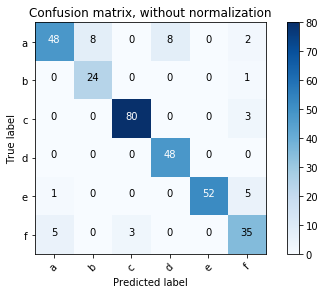

In [38]:

print(__doc__)

import sys
import numpy as np
import pandas as pd
import scipy 

from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Read Results and compared


#CK+
ruta_Predicted="../Tesis_Code/ResultsCK+/submissionCK+.csv"
ruta_test="../Tesis_Code/datasets/TestCK+.csv"

#Fer
#ruta_Predicted="../Tesis_Code/ResultsFer/submissionFer.csv"
#ruta_test="../Tesis_Code/datasets/TEST_6_categoria.csv"

#Both
#ruta_Predicted="../Tesis_Code/ResultsBoth/submissionBoth.csv"
#ruta_test="../Tesis_Code/datasets/TEST+.csv"




predicted=pd.read_csv(ruta_Predicted)
predicted=pd.DataFrame(predicted)['Label']


Y_test=pd.read_csv(ruta_test)
Y_test=pd.DataFrame(Y_test)['emotion']



#class_names=Y_test["emotion"].unique()
#print(class_names)

class_names=["a","b","c","d","e","f"];

#print(class_names)

cnf_matrix = confusion_matrix(Y_test, predicted)
np.set_printoptions(precision=2)

print(classification_report(Y_test, predicted))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')
plt.show()

In [24]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Consults (Expression Recognition in images)

Found 1 faces!
262 56 94 94


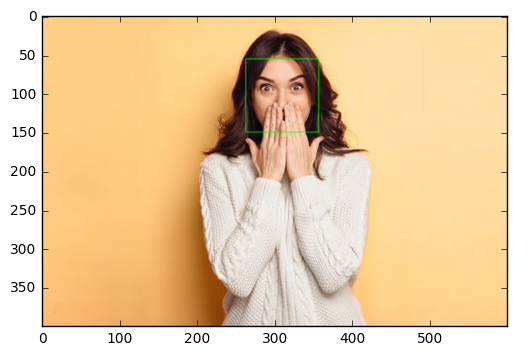

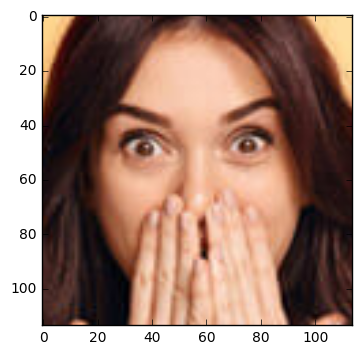

(48, 48)
1/1 [==============================] - 1s
[3]
ALEGRE


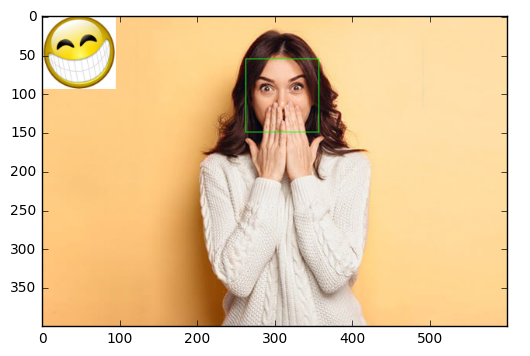

In [26]:
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm as cm

from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

face_Cascade = cv2.CascadeClassifier('../Tesis_Code/haarcascade_frontalface_alt.xml')


# Rutas archivos

rutaImagen='../Tesis_Code/Imagenes_For_Consults/30.jpg'
rutaEmotion='../Tesis_Code/Emoticons/'
rutaTest='../Tesis_Code/Emoticons/TestingImagen.csv'
rutaModel='../Tesis_Code/ResultsCK+/myModelCK+.h5'
rutaJoin='../Tesis_Code/Results_Consults/join.jpg'


# Read the image
image = cv2.imread(rutaImagen)
image2 = cv2.imread(rutaImagen)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_Cascade.detectMultiScale(
     gray,
     scaleFactor=1.1,
     minNeighbors=5,
     minSize=(30, 30),
     #flags = cv2.cv.CV_HAAR_SCALE_IMAGE
      flags=cv2.CASCADE_SCALE_IMAGE
)

print "Found {0} faces!".format(len(faces))

# Crop Padding
left = 10
right = 10
top = 10
bottom = 10

# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    print x, y, w, h

    #dibujar un rectangulo en la cara encontrada
    cv2.rectangle(image2, (x, y), (x+w, y+h), (0, 255, 0), 1)

cv2.imwrite(rutaJoin,image2)
# imagen original
b,g,r=cv2.split(image2)
image2=cv2.merge([r,g,b])

plt.imshow(image2)
plt.show()
    
#recortar una cara
image  = image[y-top:y+h+bottom, x-left:x+w+right]

#mostrar imagen recortada
b,g,r=cv2.split(image)
image=cv2.merge([r,g,b])

plt.imshow(image)
plt.show()

#escala de grises
image= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
#escaling
image = cv2.resize(image,(48, 48), interpolation = cv2.INTER_AREA)

print(image.shape)



#forma 2 mostrar imagen
#cv2.imshow ("Imagen" ,image)  # Mostrar la imagen img en una ventana llamada "Imagen" 
#cv2.waitKey (0) 
#cv2.destroyAllWindows () 




#poner en formato
b=image.ravel()
c=np.asmatrix(b)
d=pd.DataFrame(c)
d.to_csv(rutaTest,index=False)



a=pd.read_csv(rutaTest).values

testX = a.reshape(a.shape[0], 48, 48, 1).astype( 'float32' )
testX = testX / 255.0

from keras.models import load_model

model=load_model(rutaModel)
yPred = model.predict_classes(testX)


print(yPred)



#def Mostrar(image):
#    b,g,r=cv2.split(image)
#    R=cv2.merge([r,g,b])
#    plt.imshow(R)
#    plt.show()
def concat_images(imga, imgb):
    """
    Combines two color image ndarrays side-by-side.
    """
    ha,wa = imga.shape[:2]
    hb,wb = imgb.shape[:2]
    max_height = np.max([ha, hb])
    total_width = wa+wb
    new_img = np.zeros(shape=(max_height, total_width, 3), dtype=np.uint8)
    new_img[:ha,:wa]=imga
    new_img[:hb,wa:wa+wb]=imgb
    return new_img

def concat_images_inside(l_img, s_img):
    
    #redimensionar s_img para ser insertado
    r = 95.0 / image.shape[1]
    dim = (95, int(image.shape[0] * r))
    s_img= cv2.resize(s_img,dim, interpolation = cv2.INTER_AREA)
    
    #insertar parte superior izquierda
    x_offset=y_offset=0
    
    #x_offset=150
    #y_offset=0
    
    l_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]] = s_img
    return l_img

def concatenar_n_images(image_path_list):
    """
    Combines N color images from a list of image paths.
    """
    output = None
    for i, img_path in enumerate(image_path_list):
        #img = plt.imread(img_path)[:,:,:3]
        img=cv2.imread(img_path)
        img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #corregir el orden de los canales de color
        
        if i==0:
            output = img
        else:
            #output = concat_images(output, img)
            output = concat_images_inside(output,img)
            
    return output

def Emocion(var):
    
    if var == 0:
       rutaEmotion2=rutaEmotion+'M0.png'
       print("ENOJO")
    elif var == 1:
       rutaEmotion2=rutaEmotion+'M1.png'
       print("REPUGNANCIA")
    elif var == 2:
       rutaEmotion2=rutaEmotion+'M2.png'
       print("MIEDO")
    elif var == 3:
       rutaEmotion2=rutaEmotion+'M3.png'
       print("ALEGRE")
    elif var == 4:
       rutaEmotion2=rutaEmotion+'M4.png'
       print("TRISTEZA")
    elif var == 5:
       rutaEmotion2=rutaEmotion+'M5.png'
       print("SORPRESA")
    elif var == 6:
       rutaEmotion2=rutaEmotion+'M6.png'
       print("NEUTRO")
    
    #print(rutaJoin)
    #print(rutaEmotion2)
    
    #I=cv2.imread(rutaJoin)
    #I=cv2.imread(rutaEmotion2)
    #plt.imshow(I)
    #plt.show()

    images_both = [rutaJoin,rutaEmotion2]
    #print(images_both)
    output = concatenar_n_images(images_both)
    plt.imshow(output)
    plt.show()


#Visual Result
Emocion(yPred)








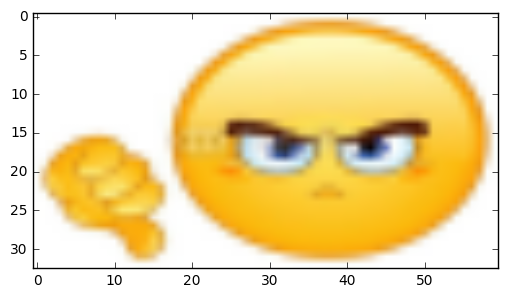

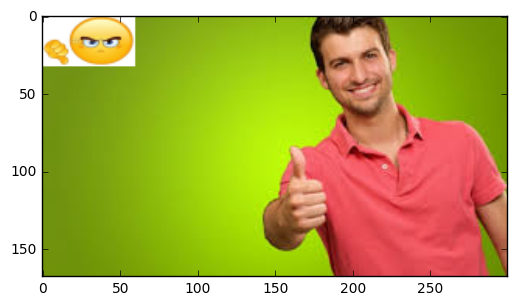

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Image
image = cv2.imread("../Tesis_Code/Imagenes_For_Consults/imagen1.jpeg")
l_img=cv2.cvtColor(l_img, cv2.COLOR_BGR2RGB)
                   
 
# emoticon
s_img = cv2.imread("../Tesis_Code/Emoticons/M0.png")
s_img=cv2.cvtColor(s_img, cv2.COLOR_BGR2RGB)

r = 60.0 / image.shape[1]
dim = (60, int(image.shape[0] * r))

s_img= cv2.resize(s_img,dim, interpolation = cv2.INTER_AREA)

plt.imshow(s_img)
plt.show()
    
x_offset=y_offset=0
l_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]] = s_img

plt.imshow(l_img)
plt.show()
